In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import STOPWORDS
filepath = r'stack-overflow-developer-survey-2024\survey_results_public.csv'
data = pd.read_csv(filepath)
df = data.copy()
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


Let's create a word cloud for starters

In [ ]:
# 1. Combine all the languagehaveworkedwith column values into one big text string
text = ' '.join(df['LanguageHaveWorkedWith'].astype(str).tolist())

#Note I updated this to keep + and =
text = re.sub(r'[^A-Za-z\s#+]', ' ', text) # 2. Remove everything that's NOT a letter (keep only A-Z, a-z, and spaces)

text = text.lower() # 3. Convert all letters to lowercase

stopwords = set(STOPWORDS) # 4. Remove common stopwords (like "the", "is", "and", etc.)
stopwords.add("nan")
text = ' '.join(word for word in text.split() if word not in stopwords)

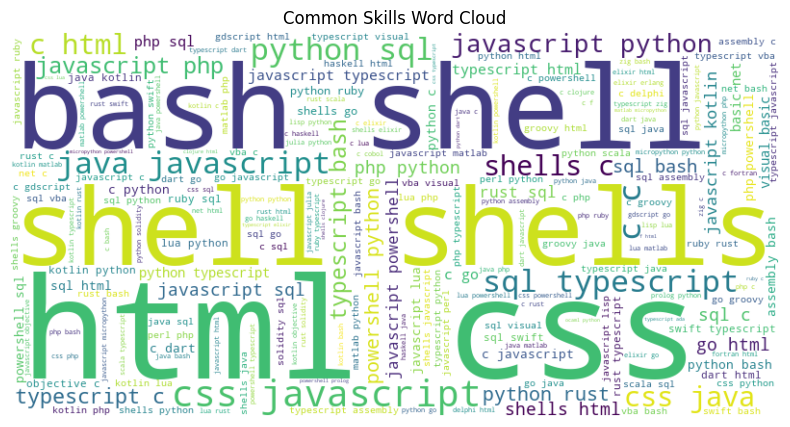

In [131]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  
plt.title("Common Skills Word Cloud")
plt.show()

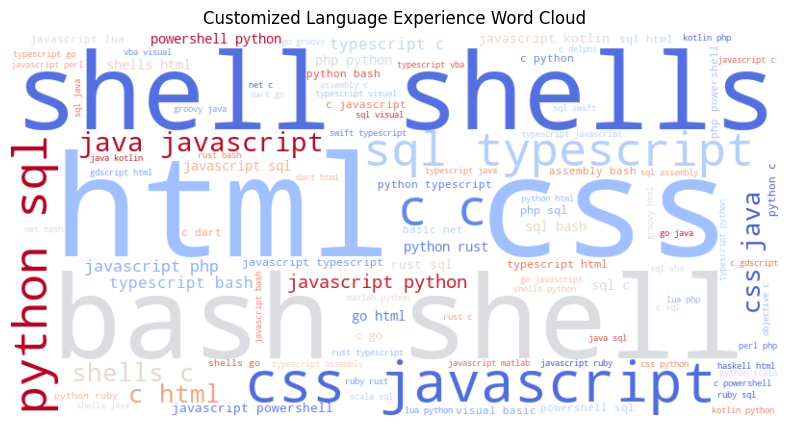

In [132]:
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='coolwarm').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Customized Language Experience Word Cloud")
plt.show()

The word cloud doesn't really reveal anything. Let's keep it simple and create a bar graph

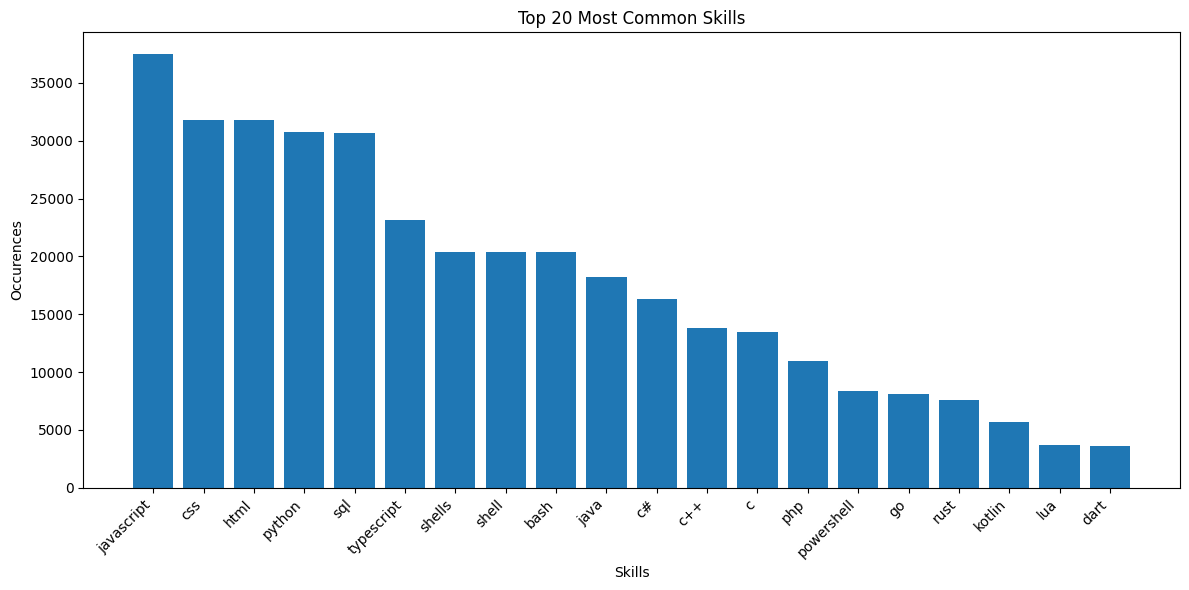

In [133]:
from collections import Counter
# Let's plot the occurances of each language experience instead of a word cloud
# Bar chart with day against tip
# Step 3: Count word occurrences
words = [word for word in text.split() if word not in stopwords]
word_counts = Counter(words)

# Step 4: Create DataFrame from the counts
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# Step 5: Plot bar graph
plt.figure(figsize=(12, 6))
plt.bar(word_freq_df['Word'][:20], word_freq_df['Count'][:20])  # Top 20 words
plt.xticks(rotation=45, ha='right')
plt.xlabel('Skills')
plt.ylabel('Occurences')
plt.title('Top 20 Most Common Skills')
plt.tight_layout()
plt.show()

Option 1 Vertical Bar Graph

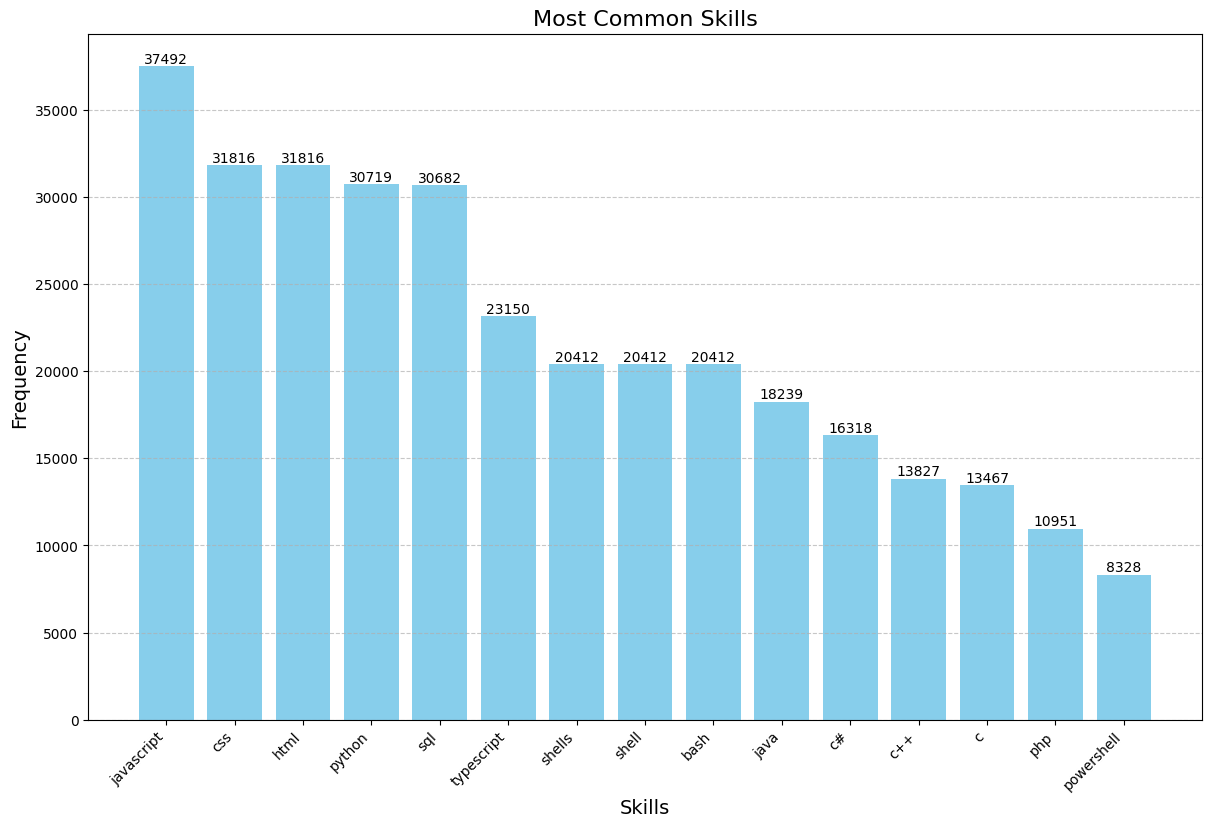

In [134]:
# 7. Plot the bar graph
plt.figure(figsize=(12, 8))
plt.title('Most Common Skills', fontsize=16)
plt.xlabel('Skills', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
bars = plt.bar(word_freq_df['Word'][:15], word_freq_df['Count'][:15], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

Option 2: Plot horizontal bar graph

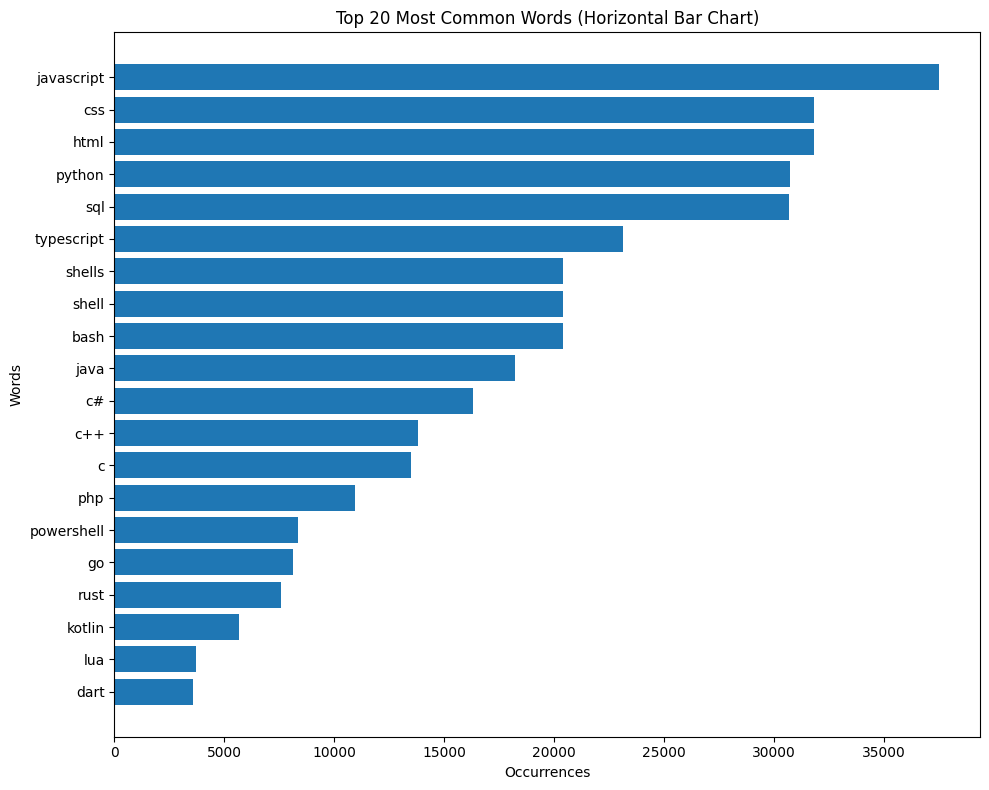

In [135]:
plt.figure(figsize=(10, 8))
plt.barh(word_freq_df['Word'][:20], word_freq_df['Count'][:20])  # Top 20 words
plt.gca().invert_yaxis()  # Most frequent word at the top
plt.xlabel('Occurrences')
plt.ylabel('Words')
plt.title('Top 20 Most Common Words (Horizontal Bar Chart)')
plt.tight_layout()
plt.show()

Analyze Survey Distribution

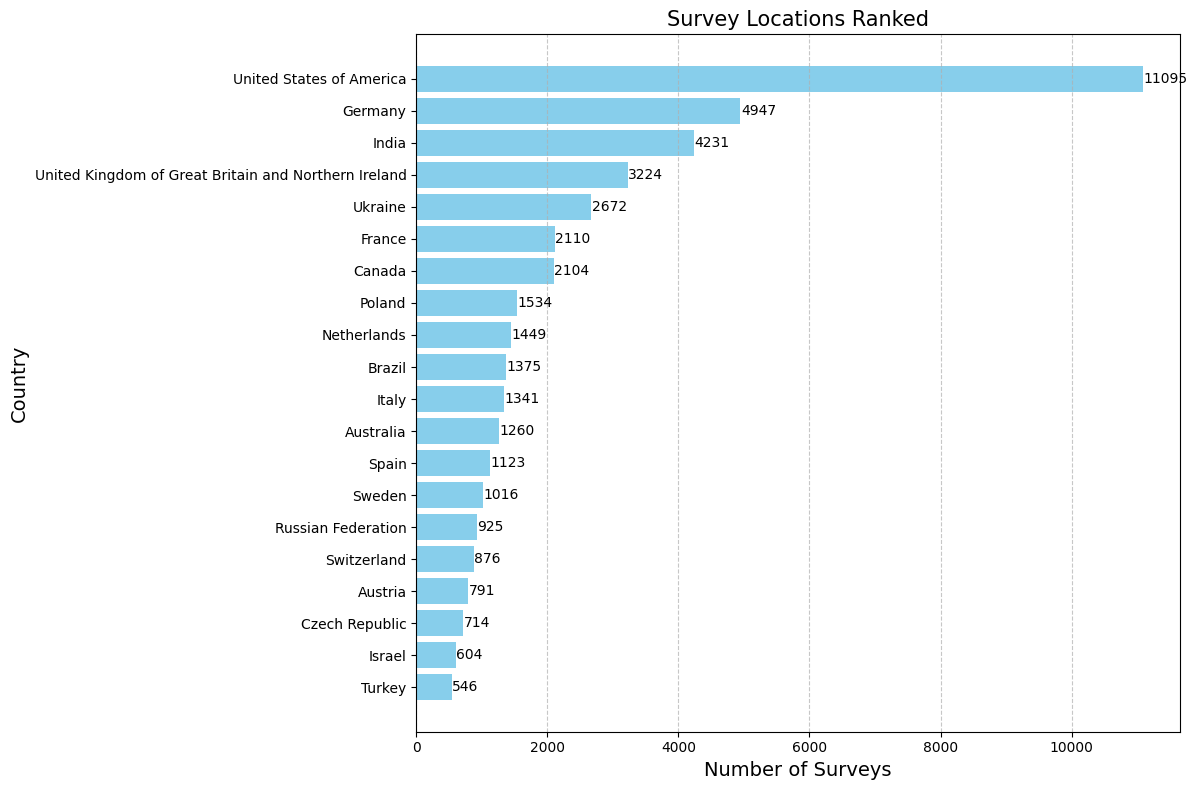

In [136]:
#group by country and count the number of records
country_counts = df['Country'].value_counts().nlargest(20)

#plot on horizontal bar graph
plt.figure(figsize=(12, 8))
bars = plt.barh(country_counts.index, country_counts.values, color='skyblue')

# Add counts next to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, int(width), va='center', fontsize=10)

# Finalize plot
plt.title('Survey Locations Ranked', fontsize=15)
plt.xlabel('Number of Surveys', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.gca().invert_yaxis()  # Highest count at top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()

Revisit Common Languages but only for USA

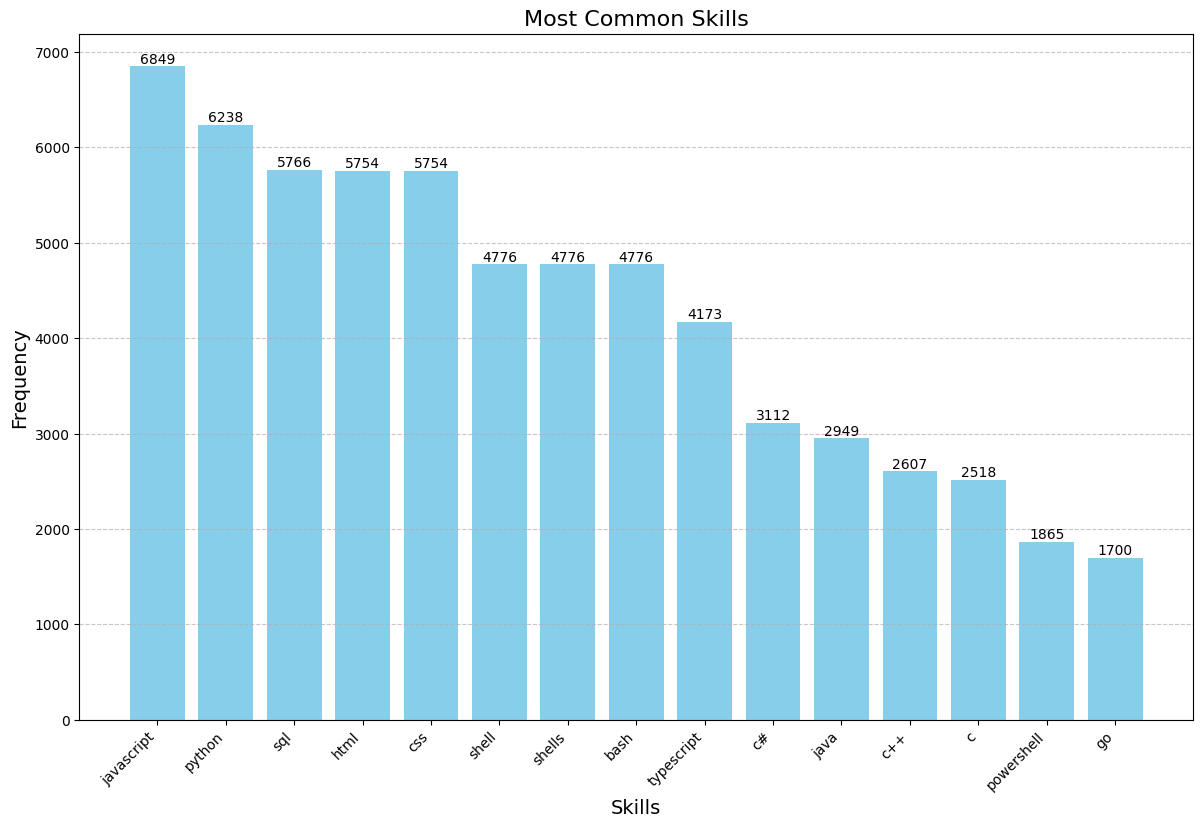

In [ ]:
filter_df_text = df[(df['Country'] == 'United States of America')]

# 1. Combine all the languagehaveworkedwith column values into one big text string
text = ' '.join(filter_df_text['LanguageHaveWorkedWith'].astype(str).tolist())

#Note I updated this to keep + and =
text = re.sub(r'[^A-Za-z\s#+]', ' ', text) # 2. Remove everything that's NOT a letter (keep only A-Z, a-z, and spaces)

text = text.lower() # 3. Convert all letters to lowercase

stopwords = set(STOPWORDS) # 4. Remove common stopwords (like "the", "is", "and", etc.)
stopwords.add("nan")
text = ' '.join(word for word in text.split() if word not in stopwords)

words = [word for word in text.split() if word not in stopwords]
word_counts = Counter(words)

# Step 4: Create DataFrame from the counts
word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count']).sort_values(by='Count', ascending=False)

# 7. Plot the bar graph
plt.figure(figsize=(12, 8))
plt.title('USA Most Common Skills', fontsize=16)
plt.xlabel('Skills', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
bars = plt.bar(word_freq_df['Word'][:15], word_freq_df['Count'][:15], color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)

Investigate USA compensation Survey Results

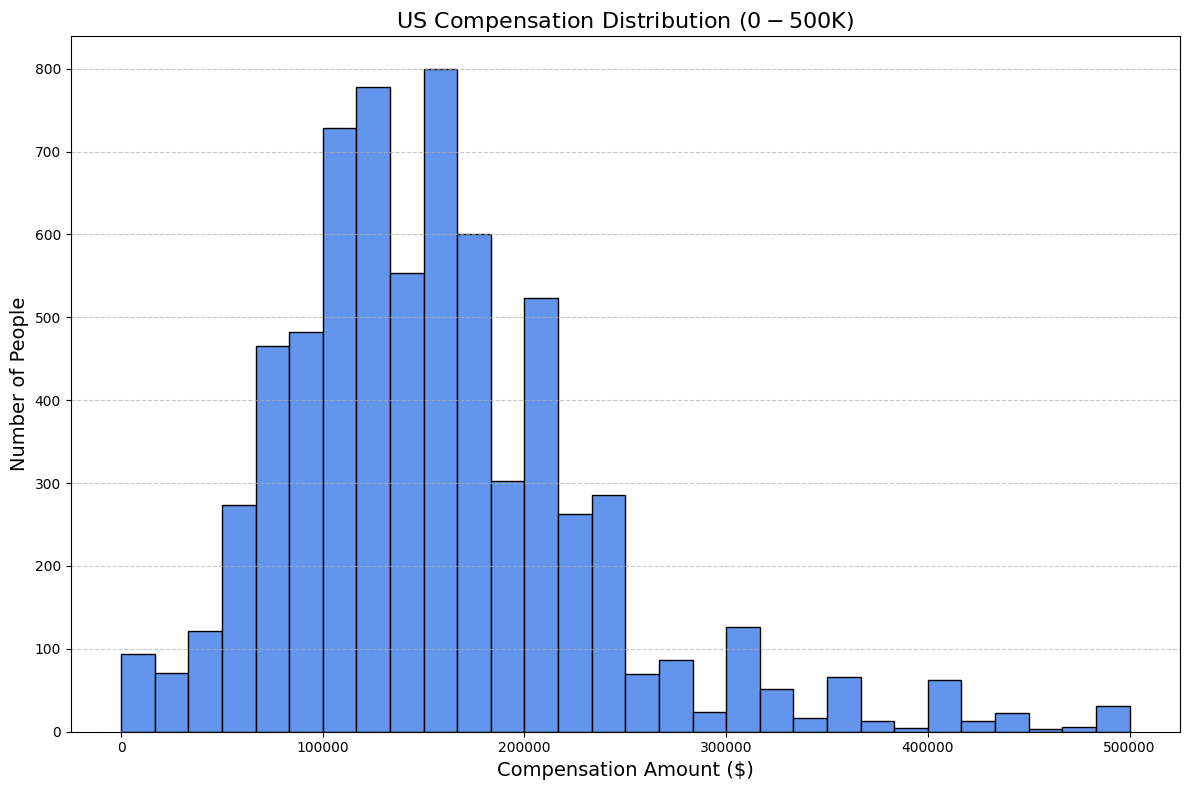

In [137]:
# Filter US compensation data
us_comp = df[df['Country'] == 'United States of America']['CompTotal']

# Drop rows missing or invalid values
us_comp = us_comp.dropna()

# Filter for compensation between 10,000 and 300,000
us_comp = us_comp[(us_comp <= 500000)]

# Plot histogram
plt.figure(figsize=(12, 8))
plt.hist(us_comp, bins=30, color='cornflowerblue', edgecolor='black')

# Finalize plot
plt.title('US Compensation Distribution ($0 - $500K)', fontsize=16)
plt.xlabel('Compensation Amount ($)', fontsize=14)
plt.ylabel('Number of People', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.show()


Additional questions
-age distribution
-remote distribution
-highest achieved degree distribution
-code experience vs compensation
-do contract/freelancers make more than the average?

In [138]:
us_comp.describe()

count      6936.000000
mean     155368.937860
std       78253.766998
min           0.000000
25%      102000.000000
50%      145000.000000
75%      194000.000000
max      500000.000000
Name: CompTotal, dtype: float64

In [139]:
#need to convert this column data type from nvarchar to int64
#get rid of 'NA' values, 'More than 50 years', 'Less than 1 year'
#df['YearsCode'] = df['YearsCode'].replace(100,"NA")
#df['YearsCode'] = df['YearsCode'].replace(50,"More than 50 years")
us_comp = us_comp[(us_comp <= 500000)]
#filtered_df = df[(df['experience'] > 5) & (df['country'] == 'USA')]
us_years_code = df[(df['Country'] == 'United States of America') & (df['CompTotal'] <= 500000)]['YearsCode']
us_years_code = us_years_code[us_years_code != "Less than 1 year"] 
us_years_code = us_years_code[us_years_code != "More than 50 years"] 
us_years_code = us_years_code[us_years_code != "NA"]

us_years_code = pd.to_numeric(us_years_code, errors='coerce').astype('Int64')

us_years_code.describe()

count       6892.0
mean     17.854324
std      10.798438
min            1.0
25%           10.0
50%           15.0
75%           25.0
max           50.0
Name: YearsCode, dtype: Float64

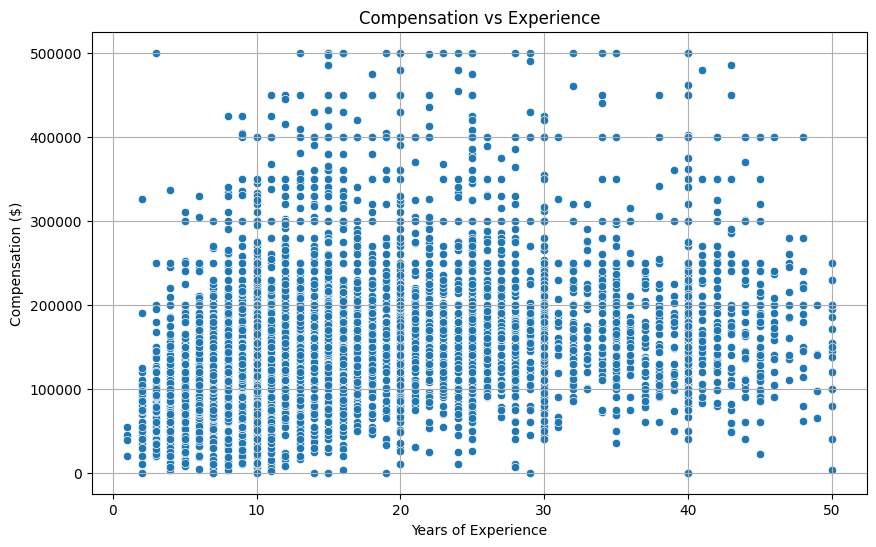

In [145]:

#us_comp = us_comp.nlargest(6897)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=us_years_code, y=us_comp)

plt.title('Compensation vs Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Compensation ($)')
plt.grid(True)
plt.show()


In [147]:
us_years_code.count()
us_comp.count()

np.int64(6897)

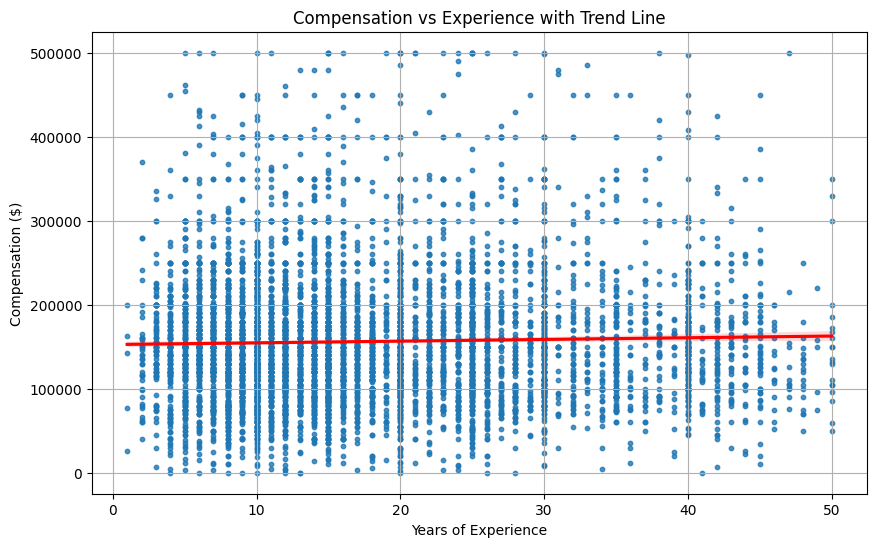

In [146]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df, 
    x=us_years_code, 
    y=us_comp, 
    scatter=True, 
    scatter_kws={"s": 10},  # smaller dots (default is ~36)
    line_kws={"color": "red"}
    )

plt.title('Compensation vs Experience with Trend Line')
plt.xlabel('Years of Experience')
plt.ylabel('Compensation ($)')
plt.grid(True)
plt.show()


C:\Users\Thus\AppData\Local\Temp\ipykernel_12808\622741404.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_comp_by_edu, x='CompTotal', y='EdLevel', palette='Blues_d')


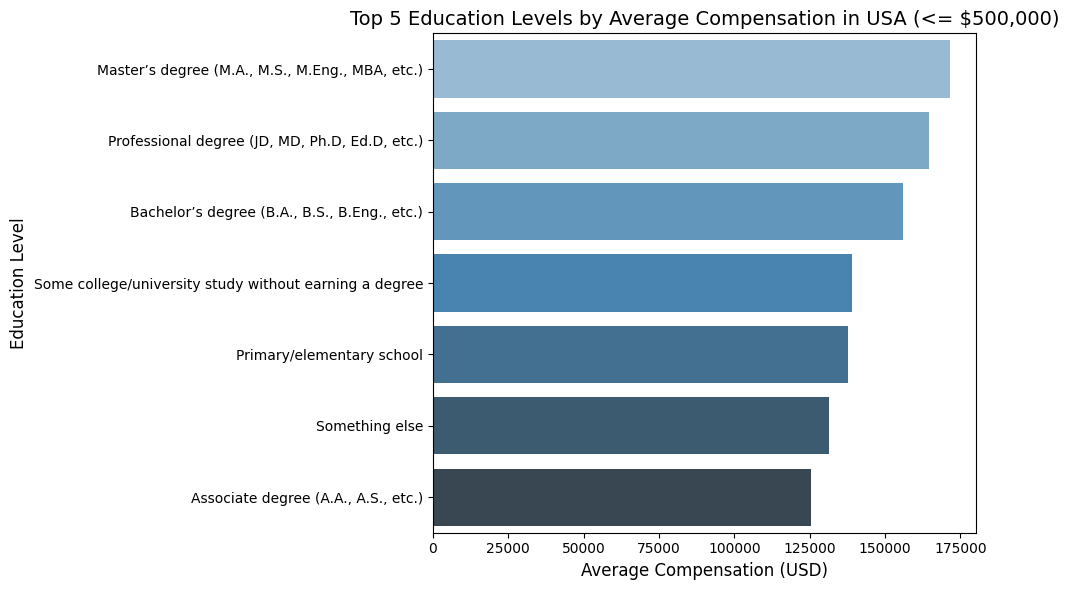

In [ ]:
# Filter dataset
filtered_df = df[(df['Country'] == 'United States of America') & (df['CompTotal'] <= 500000)]

# Group by Education Level and get average compensation
avg_comp_by_edu = (
    filtered_df.groupby('EdLevel')['CompTotal']
    .mean()
    .sort_values(ascending=False)
    .head(7)  # Top 5 education levels
    .reset_index()
)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_comp_by_edu, x='CompTotal', y='EdLevel', palette='Blues_d')

plt.xlabel('Average Compensation (USD)', fontsize=12)
plt.ylabel('Education Level', fontsize=12)
plt.title('Top Education Levels by Average Compensation in USA (<= $500,000)', fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\Thus\AppData\Local\Temp\ipykernel_12808\1727381682.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_counts, x='Count', y='JobTitle', palette='viridis')


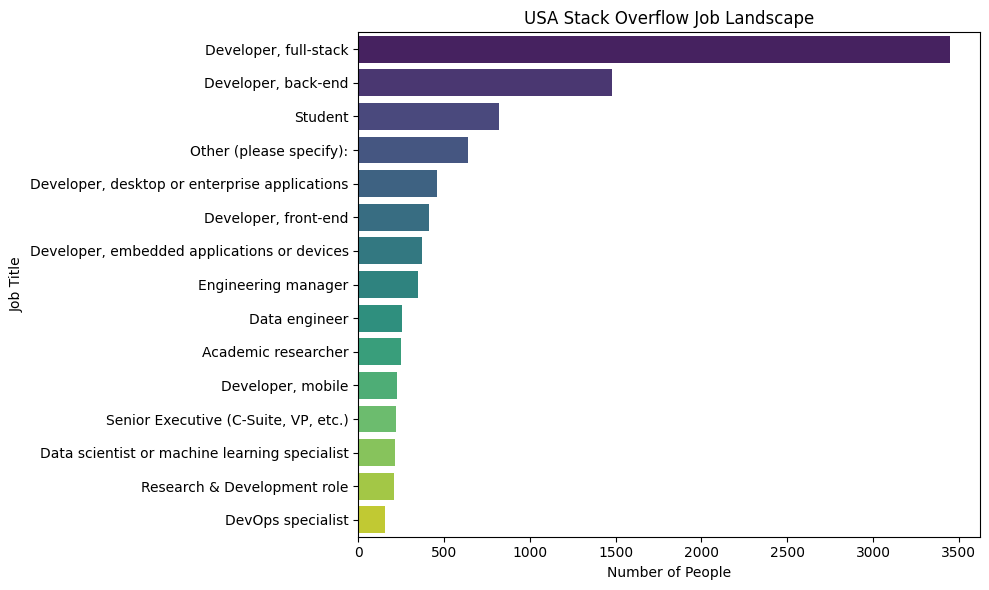

In [184]:
usa_df = df[df['Country'] == 'United States of America']

# Count the occurrences of each job title
#job_counts = df['DevType'].value_counts().head(15).reset_index()
job_counts = usa_df['DevType'].value_counts().head(15).reset_index()
job_counts.columns = ['JobTitle', 'Count']

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=job_counts, x='Count', y='JobTitle', palette='viridis')

plt.xlabel('Number of People')
plt.ylabel('Job Title')
plt.title('USA Stack Overflow Job Landscape')
plt.tight_layout()
plt.show()